# Spatial plots of changes at 4-km resolution 
The variables are saved into netcdf files using 'calc_seasonalmean_savenc.py'

Decided not to do ensemble averages as it is dominated by the larger changes

In [1]:
%who

Interactive namespace is empty.


In [20]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import sys
import glob

new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pyproj import Proj
import cartopy.crs as ccrs
%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
!mkdir -p /home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_4km_noBaseFlow/seasonal_spatPatterns/2016/selectedRun
!mkdir -p /home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_4km_noBaseFlow/seasonal_spatPatterns/2017/selectedRun
!mkdir -p /home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_4km_noBaseFlow/seasonal_spatPatterns/2016-17/selectedRun

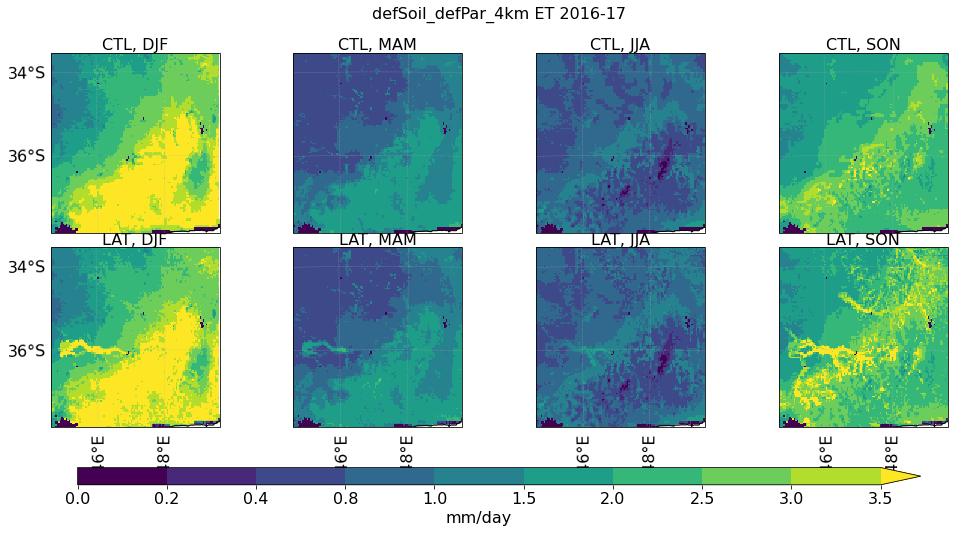

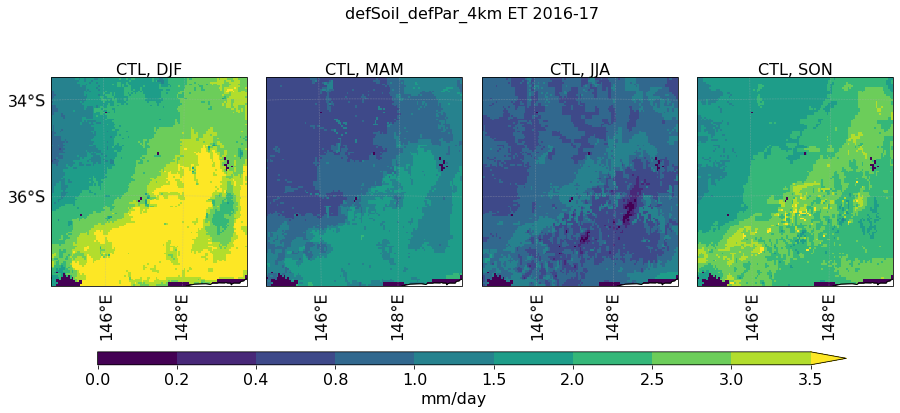

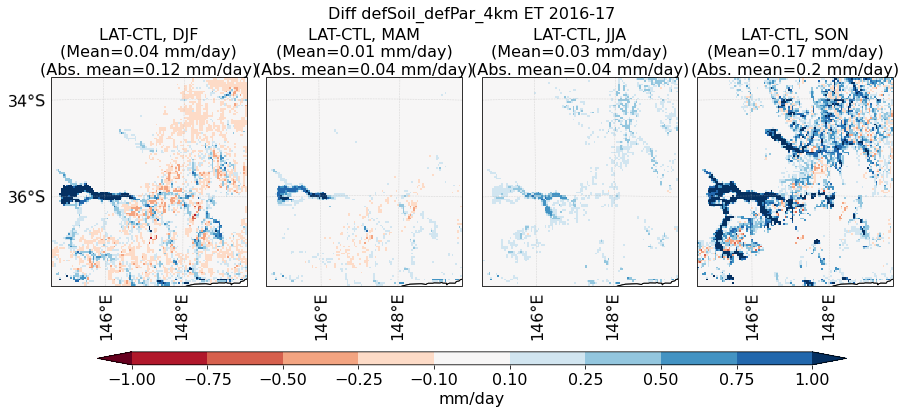

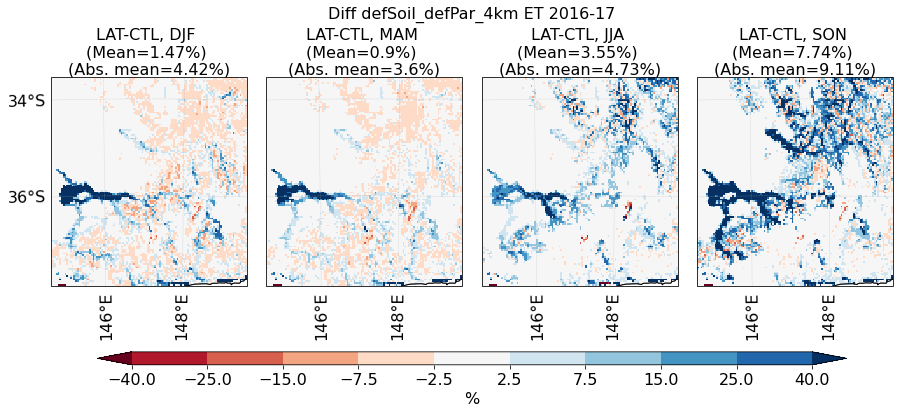

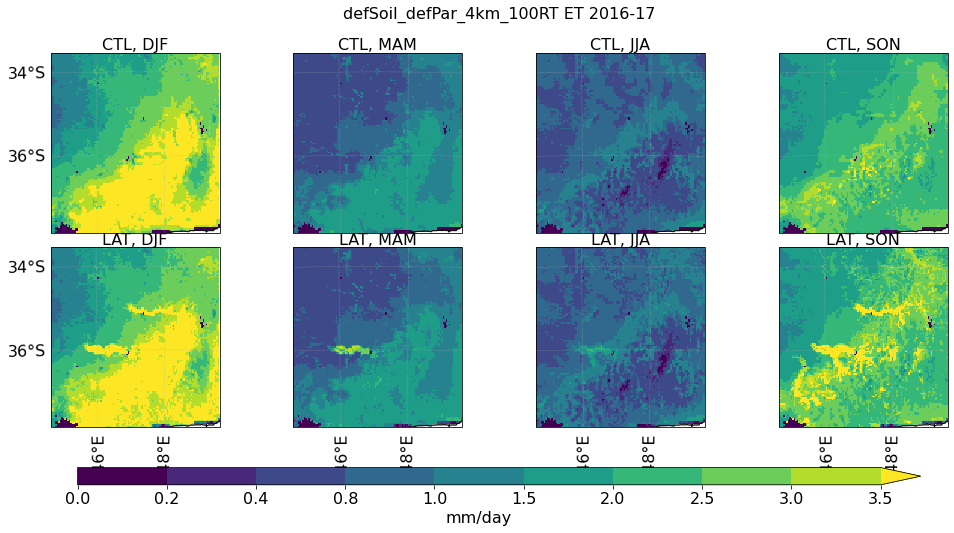

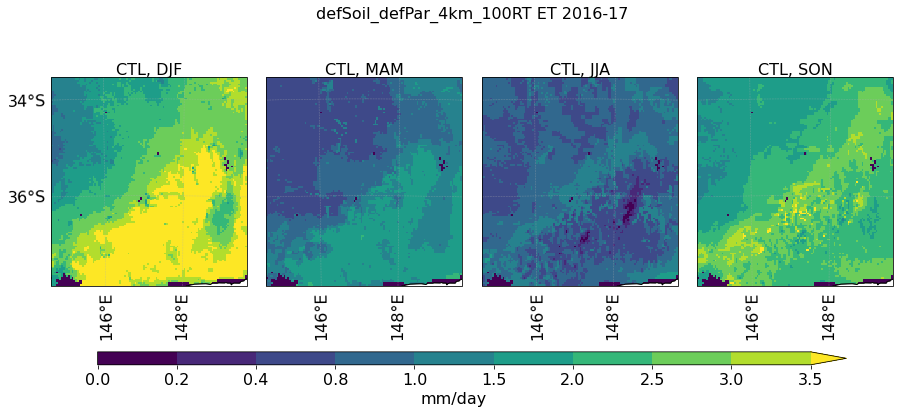

In [ ]:
fig_dir='/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_4km_noBaseFlow/seasonal_spatPatterns/'

# just get a temporary 
#wrf_hydro_temp = '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_defSoil_defPar/trunk/NDHMS/Run/'
wrf_hydro_temp = '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/'
ds_temp = xr.open_dataset(wrf_hydro_temp + 'OUTPUT/DAILY_FILES/LH_concatTime.nc')
X, Y = np.meshgrid(ds_temp.x.values, ds_temp.y.values)
source = Proj(ds_temp.proj4)
lon, lat = source(X.flatten(), Y.flatten(), inverse=True)
lon_2d = lon.reshape(X.shape)
lat_2d = lat.reshape(Y.shape)

xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

########################
# FILENAMES
########################
# the filenames
fname_list = ['ET'] #['LH'] #, 'HFX', 'SOIL_M_2layer', 'SOIL_M', 'SOIL_M'] #, 'SOIL_M', 'SOIL_M', 'SOIL_M_total', 'SOIL_M_2layer_seasonal_accum', 'SOIL_M_total_seasonal_accum']
# suffix of filenames; the seasonal accumulation files don't have a suffix
#fname_suffix_list = ['_mean']*2
fname_suffix_list = ['_mean']*8
fname_suffix_list.extend(['',''])

########################
# VARNAMES
########################                         
varname_list = ['ET'] #['LH', 'HFX']
# all the soil mois. variables are named the same inside the file
#varname_list.extend(['SOIL_M']*8)

########################
# ADD SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'

# to plot SW basin boundaries & rivers
# shapefile = [sh1, sh2]
# shapefile_color=['darkgrey', 'deeppink']
# sh_lwd = [1, 2]
# sh_alpha = 0.3

# to plot  rivers
shapefile = [sh2]
shapefile_color=['deeppink']
sh_lwd = [1]
sh_alpha = 0.3

########################
# SHOULD A SOIL LVL INSIDE BE SUBSETTED?
########################
# used only for soil moisture
sm_level_list = [None, None, None, 0, 1, 2, 3, None, None, None]

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

#**** 4-km Runs original runs with baseflow ****
# hydro_ctl_dir_list = '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_defSoil_defPar/trunk/NDHMS/Run/'
# hydro_lat_dir = '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_defSoil_defPar/trunk/NDHMS/Run/'

# wrf_hydro_ctl_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_defSoil_kPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_ternSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_ternSoil_kPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_noCalib_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']

# wrf_hydro_lat_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_defSoil_kPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_ternSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_ternSoil_kPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_noCalib_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']

# run_name_list = ['defSoil_defPar_4km', 'defSoil_kPar_4km', 'ternSoil_defPar_4km', 'ternSoil_kPar_4km', 'noCalib_defSoil_defPar']

# wrf_hydro_lat_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/concat_results_lat/seasonal_data/']
# wrf_hydro_ctl_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/concat_results_ctl/seasonal_data/']
# run_name_list = ['ensemble_mean']

# wrf_hydro_ctl_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
# wrf_hydro_lat_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_12g_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
# run_name_list = ['defSoil_defPar_4km']

#**** 4-km Runs without baseflow ****
# wrf_hydro_lat_list = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_defSoil_kishPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_tern1m_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_tern1m_kishPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_tern_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']

# wrf_hydro_ctl_list = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_kishPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_tern1m_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_tern1m_kishPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
#                       '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_tern_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
#                       #/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_tern_kishPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/"]
# run_name_list = ['defSoil_defPar_4km', 'defSoil_kPar_4km', 'tern1m_defPar_4km', 'tern1m_kPar_4km', 'ternTop_defSoil_defPar']

#**** The selected run without baseflow ***
wrf_hydro_lat_list = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km_100mRT/wrf_hydro_nwm_public-5.2.0_domain4_4km_t500_RTCHon_4g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
                      #'/g/data/w28/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km_167mRT/wrf_hydro_nwm_public-5.2.0_domain4_4km_t180_RTCHon_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
wrf_hydro_ctl_list = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
                      #'/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
run_name_list = ['defSoil_defPar_4km', 'defSoil_defPar_4km_100RT'] #, 'defSoil_defPar_4km_167RT']

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# calc_seasonalmean_savenc saves data for these time slices
#time_key_list = ['2016', '2017', '2016-17']
time_key_list = ['2016-17']
for hydro_ctl_dir, hydro_lat_dir, run_name in zip(wrf_hydro_ctl_list, wrf_hydro_lat_list, run_name_list):
    for time_key in time_key_list:
        #out_dir = fig_dir + time_key + '/selectedRun_wBasin/' 
        out_dir = fig_dir + time_key + '/selectedRun/' 
        #out_dir = fig_dir + time_key + '/' 
        for fname, suffix, varname, sm_lvl in zip(fname_list, fname_suffix_list, varname_list, sm_level_list):
            ds_ctl = xr.open_dataset(hydro_ctl_dir + time_key + '_' + fname + suffix + '.nc')
            ds_lat = xr.open_dataset(hydro_lat_dir + time_key + '_' + fname + suffix + '.nc')
            if sm_lvl is not None:
                da_ctl = ds_ctl[varname].isel(soil_layers_stag=sm_lvl)
                da_lat = ds_lat[varname].isel(soil_layers_stag=sm_lvl)
                mean_clevels = col_levels_mean[fname][sm_lvl]
                diff_clevels = col_levels_diff[fname][sm_lvl]
                diff_clevels_perc = col_levels_diff_perc[fname][sm_lvl]
                lvl_text = '_layer_' + str(sm_lvl+1)
            else:
                da_ctl = ds_ctl[varname]
                da_lat = ds_lat[varname]
                mean_clevels = col_levels_mean[fname]
                diff_clevels = col_levels_diff[fname]
                diff_clevels_perc = col_levels_diff_perc[fname]
                lvl_text = ''
            
            #***********************************
            # Absolute values
            #***********************************
            plot_list = [da_ctl.sel(season = s) for s in seas_names]
            plot_list.extend([da_lat.sel(season = s) for s in seas_names])
    
            for x in plot_list:
                x.coords['lat'] = (x.dims, lat_2d)
                x.coords['lon'] = (x.dims, lon_2d)    
            subplot_title = [x + ', ' + y for x in ['CTL', 'LAT'] for y in seas_names]
        
            # set different colormap if accumulated var
            if 'accum' in fname.split('_'):
                cmap = 'RdBu'
                cbar_extend = 'both'
            else:
                cmap = 'viridis'
                cbar_extend = 'max'
                
            panel_height = 6
            fig1_both = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=2, projection=projection,
                                                        subplot_title=subplot_title, main_title=run_name + ' ' + fname +  lvl_text + ' ' + time_key, 
                                                        xticks=xticks, yticks=yticks, #level=[]
                                                        levels=mean_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units[varname],longer_cbar=True,
                                                        #panel_height=panel_height, panel_width=panel_width,
                                                        out_dir=out_dir, out_figname=run_name + '_' + fname +  lvl_text + '_' + time_key , fig_dpi=600)
                                                        #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

            fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list[0:4], ncols=4, nrows=1, projection=projection,  
                                                   subplot_title=subplot_title, main_title=run_name + ' ' + fname +  lvl_text + ' ' + time_key, 
                                                   xticks=xticks, yticks=yticks, #level=[]
                                                   panel_height=panel_height, panel_width=panel_width,
                                                   levels=mean_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units[varname],longer_cbar=True,
                                                   out_dir=out_dir, out_figname=run_name + '_' + fname +  lvl_text + '_' + time_key + '_onlyCTL', fig_dpi=600)
            #fig1.clear()
            #plt.close()
    
            #***********************************
            # Differences
            #***********************************
            diff_plot_list = [da_lat.sel(season = s)-da_ctl.sel(season = s) for s in seas_names]
            for x in diff_plot_list:
                x.coords['lat'] = (x.dims, lat_2d)
                x.coords['lon'] = (x.dims, lon_2d)
    
            # diff_mean = [np.round(a.mean(['x','y']).values,5) for a in diff_plot_list]
            # diff_abs_mean = [np.round((np.abs(a)).mean(['x','y']).values,5) for a in diff_plot_list]

            #**** For Paper Fig
            diff_mean = [np.round(a.mean(['x','y']).values,2) for a in diff_plot_list]
            diff_abs_mean = [np.round((np.abs(a)).mean(['x','y']).values,2) for a in diff_plot_list]
            #***
            ctl_mean = [da_ctl.sel(season = s).mean(['x','y']).values for s in seas_names]
    
            subplot_title = ['LAT-CTL' + ', ' + x + '\n(Mean=' + str(y) + ' ' + units[varname] + ')' + '\n(Abs. mean=' + str(z) + ' ' + units[varname] + ')' for (x, y, z) in zip(seas_names, diff_mean, diff_abs_mean)]
    
            panel_height=6
            fig2 = myfuncs.draw_pcolormesh_Npanels(diff_plot_list, ncols=4, nrows=1, projection=projection, 
                                                   subplot_title=subplot_title, main_title='Diff ' + run_name + ' ' + fname +  lvl_text + ' ' + time_key,  
                                                   xticks=xticks, yticks=yticks, #level=[]
                                                   levels=diff_clevels, cmap='RdBu', cbar_label=units[varname], longer_cbar=True, 
                                                   panel_height=panel_height, panel_width=panel_width,
                                                   out_dir=out_dir, out_figname=run_name + '_' + fname +  lvl_text + '_difference_' + time_key, fig_dpi=600)
                                                   #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)
            #fig2.clear()
            #plt.close()
    
            #***********************************
            # % Differences
            #***********************************
            perc_diff_plot_list = [(da_lat.sel(season = s)-da_ctl.sel(season = s))/da_ctl.sel(season = s)*100 for s in seas_names]
            for x in perc_diff_plot_list:
                x.coords['lat'] = (x.dims, lat_2d)
                x.coords['lon'] = (x.dims, lon_2d)
    
            perc_diff_mean = [np.round(x/y*100,2) for (x,y) in zip(diff_mean, ctl_mean)]
            perc_diff_abs_mean = [np.round(x/y*100,2) for (x,y) in zip(diff_abs_mean, ctl_mean)]
            subplot_title = ['LAT-CTL' + ', ' + x + ' \n(Mean=' + str(y) + '%)' + ' \n(Abs. mean=' + str(z) + '%)'for (x, y, z) in zip(seas_names, perc_diff_mean, perc_diff_abs_mean)]
    
            panel_height=6
            fig3 = myfuncs.draw_pcolormesh_Npanels(perc_diff_plot_list, ncols=4, nrows=1, projection=projection, 
                                                   subplot_title=subplot_title, main_title='Diff ' + run_name + ' ' + fname +  lvl_text + ' ' + time_key, 
                                                   xticks=xticks, yticks=yticks, #level=[]
                                                   cmap='RdBu', levels=diff_clevels_perc, cbar_label='%', longer_cbar=True, 
                                                   panel_height=panel_height, panel_width=panel_width,
                                                   out_dir=out_dir, out_figname=run_name + '_' + fname +  lvl_text + '_perc_difference_' + time_key, fig_dpi=600)
                                                   #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)
            # fig3.clear()
            # plt.close()